In [1]:
from jira import JIRA
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
server = {'server': 'https://serverName.atlassian.net/'}
jira = JIRA(server, basic_auth=('test@mail.com', 'enterYourToken'))

In [3]:
issues = jira.search_issues('assignee = currentUser()', maxResults=500)

In [4]:
slice_object = slice(7)
for issue in issues:
    with open('text.csv', 'w', newline='', encoding='utf-8') as     csvfile:
        fieldnames = ['date']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for issue in issues:
            writer.writerow({'date':  issue.fields.created[slice_object]})

In [5]:
df = pd.read_csv('text.csv', sep =";")

In [6]:
df.head()

,date
0,2020-07
1,2020-03
2,2020-03
3,2020-02
4,2020-12


In [7]:
count_unique = pd.DataFrame(df.date.value_counts().reset_index().values, columns=["Date", "Count"])
count_uniqueindex = count_unique.sort_index(axis = 0, ascending=True)
count_uniqueindex
df = count_uniqueindex.sort_values(by=['Date'])

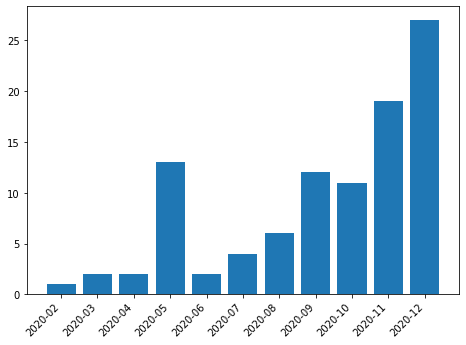

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Date = df['Date']
Count = df['Count']
ax.bar(Date,Count)
plt.xticks(rotation=45, ha='right')
plt.show()